In [45]:
import torch
import torchvision

from PIL import Image
from torchvision import transforms

In [46]:
if torch.cuda.is_available:
    device = torch.device("cuda")

# Importing weights from pretrained resnet50
model = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.DEFAULT)

# Using the cat image
filename = "cat.jpg"

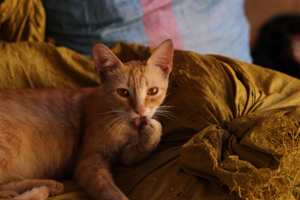

In [47]:
# Seeing the image
input_image = Image.open(filename)

resized_image = input_image.resize((300, 200))
display(resized_image)

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

In [ ]:
# move the input and model to GPU for speed if available
input_batch = input_batch.to(device)
model.to(device)

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
# print(output[0])
# The output has unnormalized scores. To get  probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
#print(probabilities)

In [50]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Egyptian cat 0.002316928468644619
kit fox 0.002011143835261464
grey fox 0.0017831771401688457
lynx 0.0017297882586717606
mongoose 0.001726760994642973
